In [59]:
%pip install matplotlib
%pip install nltk
%pip install pandas
%pip install seaborn
%pip install sklearn.feature_extraction.text
%pip install sklearn.model_selection
%pip install sklearn.naive_bayes
%pip install sklearn.metrics
%pip install scikit-learn

688232.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
688239.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
688245.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
688252.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is avail

In [60]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_recall_fscore_support)

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
df = pd.read_csv('file:///Users/liviagaione/Downloads/BOLSONAROHADDAD.csv', encoding='utf-8')

In [63]:
df2 = df[['tweet_text', 'label', 'query_used']]
print(df2)

                                              tweet_text  label query_used
0      Reflexos da alienação petista comandada por Lu...      0     haddad
1      chegueclara exatamente mas o PT tá querendo hy...      0     haddad
2            kayqueorneles poxa ( só pq eu gosto do lula      0     haddad
3      Graças a um amigo me dei conta ontem que estar...      1     haddad
4      ptbrasil NPTO LulaOficial poxa ( Boicotaram a ...      0     haddad
...                                                  ...    ...        ...
26952  Vai “tomar esporro da esposa ))) jairbolsonaro...      1  bolsonaro
26953  hoje 22 de outubro é o dia do paraquedista. pa...      1  bolsonaro
26954  Marilia61758583 leilarcosta jairbolsonaro Esta...      1  bolsonaro
26955  valoreconomico A diferença de público nas mani...      1  bolsonaro
26956  PPlacete Derrotas_D delucca jairbolsonaro ning...      1  bolsonaro

[26957 rows x 3 columns]


In [64]:
df = df.replace(r'http\S+', '', regex=True)
df = df.replace(r'RT+',     '', regex=True)
df = df.replace(r'@\S+',    '', regex=True)
df = df.replace(r'RT+',     '', regex=True)
df = df.replace(r'p+ ',     '', regex=True)
df = df.replace(r'q+ ',     '', regex=True)
df = df.replace(r'd+ ',     '', regex=True)
df = df.replace(r'D+ ',     '', regex=True)
df = df.replace(r'P+ ',     '', regex=True)

In [65]:
%pip install wordcloud

688291.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


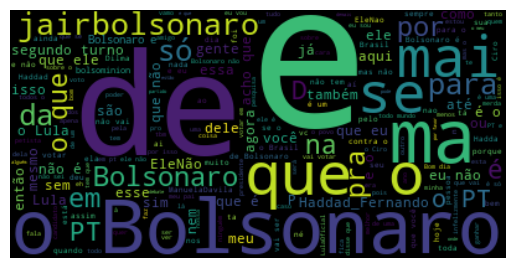

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df2 = df['tweet_text']

#convert list to string and generate
unique_string=(" ").join(df2)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [67]:
from pprint import pprint
import re

In [68]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].tweet_text)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == 0].tweet_text)[:5], width=200)

Positive headlines:

['Graças a um amigo me dei conta ontem que estarei em Brasília na mesmo dia do registro da candidatura do Lula. Dia histórico que não perco por nada! Vai ser um dia antes do evento. Agenda livre '
 'Lula livre! )))',
 "Bom dia para quem não é Manuela D'Ávila (ManuelaDavila) aquela que fugiu como uma garota comunista e voltou para as asas do Lula. ",
 'Estadao Esse Lula é muito besta viu?! O Fernandinho Beira-mar poderia agregar muito mais eleitores. -) LulaNaCadeia',
 'Lula Haddae Manuela Bem é uma luz - a primeira em meio a tempestade. )',
 'Opoeta_won Você está falando do Lula né? O Haddaé mais clarinho mas é do Oriente Médio também. )']

Negative headlines:

['Reflexos da alienação petista comandada por Lula no país das Maravilhas no mundo real Lula é um corrupto inelegível Haddaé um poste e Manuela sem sal e inexpressiva será a vice. Alguém consegue '
 'levar o Brasil sério? ( ',
 'chegueclara exatamente mas o PT tá querendo hypar o Lula como herói nacional. va

In [69]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].query_used)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == 0].query_used)[:5], width=200)

Positive headlines:

['haddad', 'haddad', 'haddad', 'haddad', 'haddad']

Negative headlines:

['haddad', 'haddad', 'haddad', 'haddad', 'haddad']


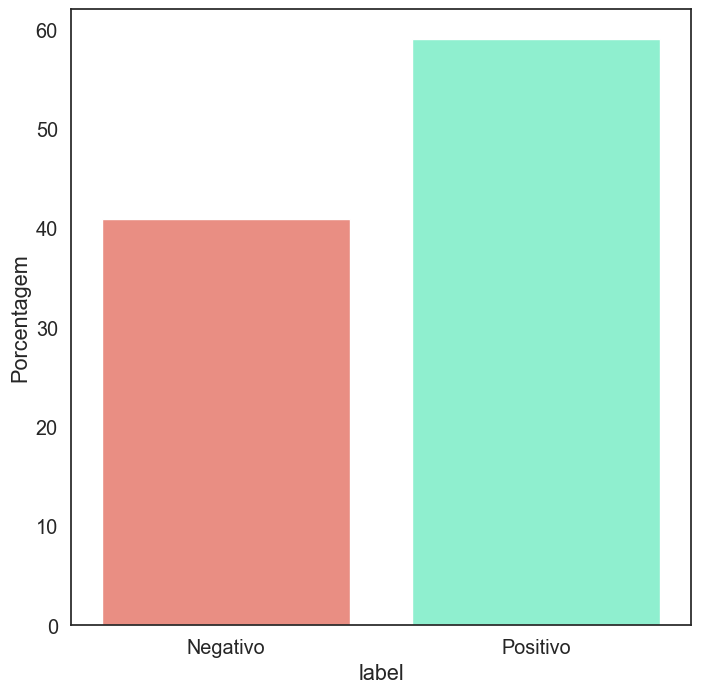

In [70]:
# Crie uma figura e eixos
fig, ax = plt.subplots(figsize=(8, 8))

# Calcule as contagens normalizadas
counts = df.label.value_counts(normalize=True) * 100

# Crie o gráfico de barras com cores diferentes
sns.barplot(x=counts.index, y=counts, ax=ax, palette=['#FA8072', '#7FFFD4'])

# Ajuste os rótulos do eixo x
ax.set_xticklabels(['Negativo', 'Positivo'])
ax.set_ylabel("Porcentagem")

# Exiba o gráfico
plt.show()


In [71]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "Isso é um exemplo de sentença!"

print(word_tokenize(example, language='portuguese'))


['Isso', 'é', 'um', 'exemplo', 'de', 'sentença', '!']


In [72]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['Isso', 'é', 'um', 'exemplo', 'de', 'sentença']


In [73]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')

print(stop_words[:20])

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
def process_texto(tweet_text):
    tokens = []
    for line in tweet_text:
        line = line.lower()
        tok = tokenizer.tokenize(line)
        tok = [t for t in tok if t not in stop_words]
        tokens.extend(tok)

    return tokens

In [75]:
pos_lines = list(df[df.label == 1].tweet_text)

pos_tokens = process_texto(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(100)

[('bolsonaro', 4914),
 ('pra', 2104),
 ('jairbolsonaro', 1840),
 ('vai', 1694),
 ('pt', 1666),
 ('lula', 1601),
 ('haddad_fernando', 1390),
 ('d', 1194),
 ('vc', 950),
 ('bem', 892),
 ('votar', 838),
 ('aqui', 783),
 ('bom', 770),
 ('dia', 705),
 ('tá', 687),
 ('gente', 677),
 ('agora', 665),
 ('vou', 665),
 ('sobre', 661),
 ('ter', 630),
 ('brasil', 622),
 ('pode', 619),
 ('sim', 582),
 ('contra', 581),
 ('ver', 575),
 ('voto', 565),
 ('tudo', 561),
 ('ainda', 555),
 ('todos', 555),
 ('turno', 554),
 ('p', 544),
 ('fazer', 534),
 ('manueladavila', 530),
 ('nao', 476),
 ('presidente', 476),
 ('boa', 473),
 ('melhor', 473),
 ('cara', 468),
 ('elenão', 464),
 ('acho', 457),
 ('assim', 455),
 ('então', 451),
 ('nada', 439),
 ('vamos', 432),
 ('quer', 430),
 ('aí', 427),
 ('ciro', 415),
 ('hoje', 413),
 ('pro', 398),
 ('pessoas', 393),
 ('porque', 383),
 ('segundo', 376),
 ('coisa', 375),
 ('falar', 368),
 ('lá', 362),
 ('bolsominion', 361),
 ('n', 360),
 ('todo', 359),
 ('sabe', 351),
 ('

In [76]:
neg_lines = list(df[df.label == 0].query_used)

neg_tokens = process_texto(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(100)

[('haddad', 6148), ('bolsonaro', 4888)]

In [77]:
neg_lines = list(df[df.label == 0].tweet_text)

neg_tokens = process_texto(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(100)

[('bolsonaro', 3330),
 ('pt', 1942),
 ('pra', 1524),
 ('vai', 1370),
 ('lula', 984),
 ('votar', 980),
 ('gente', 872),
 ('turno', 821),
 ('triste', 793),
 ('queria', 746),
 ('ciro', 679),
 ('segundo', 671),
 ('tá', 656),
 ('ter', 650),
 ('to', 624),
 ('bolsominion', 576),
 ('medo', 510),
 ('acho', 501),
 ('n', 491),
 ('nao', 486),
 ('ainda', 477),
 ('vou', 477),
 ('pro', 473),
 ('agora', 472),
 ('infelizmente', 467),
 ('ver', 464),
 ('aqui', 443),
 ('tô', 429),
 ('brasil', 427),
 ('tão', 426),
 ('bem', 421),
 ('jairbolsonaro', 421),
 ('sei', 404),
 ('elenão', 393),
 ('haddad_fernando', 390),
 ('contra', 379),
 ('ganhar', 379),
 ('pessoas', 379),
 ('sim', 375),
 ('bozo', 374),
 ('cara', 365),
 ('tudo', 357),
 ('voto', 344),
 ('ta', 338),
 ('hadda', 332),
 ('quero', 316),
 ('ai', 314),
 ('dia', 307),
 ('ir', 303),
 ('dilma', 300),
 ('vc', 299),
 ('hoje', 289),
 ('fazer', 288),
 ('elenao', 284),
 ('nada', 283),
 ('tanto', 277),
 ('todo', 276),
 ('assim', 269),
 ('país', 265),
 ('sobre', 2

In [78]:
import math
import random
from collections import defaultdict
from pprint import pprint

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

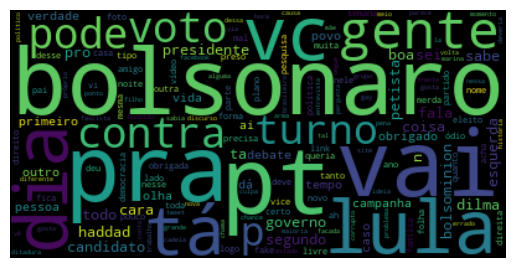

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(pos_freq)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

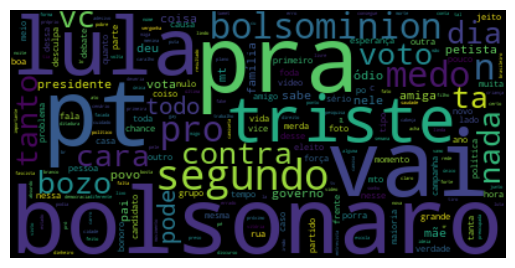

In [80]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(neg_freq)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

t1 = "Eu gosto muito do Ciro Gomes e seu pocisionamento"
t2 = "Eu gosto muito quando Ciro Gomes fala sobre politíca"

vect = CountVectorizer(binary=True)
X = vect.fit_transform([t1, t2])

X.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]])

In [82]:
list(zip(X.toarray()[0], vect.get_feature_names_out()))

[(1, 'ciro'),
 (1, 'do'),
 (1, 'eu'),
 (0, 'fala'),
 (1, 'gomes'),
 (1, 'gosto'),
 (1, 'muito'),
 (1, 'pocisionamento'),
 (0, 'politíca'),
 (0, 'quando'),
 (1, 'seu'),
 (0, 'sobre')]

In [83]:
list(zip(X.toarray()[1], vect.get_feature_names_out()))


[(1, 'ciro'),
 (0, 'do'),
 (1, 'eu'),
 (1, 'fala'),
 (1, 'gomes'),
 (1, 'gosto'),
 (1, 'muito'),
 (0, 'pocisionamento'),
 (1, 'politíca'),
 (1, 'quando'),
 (0, 'seu'),
 (1, 'sobre')]

In [84]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.tweet_text)

X.toarray()

list(zip(X.toarray()[3], vect.get_feature_names_out()))


[(0, '10'),
 (0, '100'),
 (0, '12'),
 (0, '13'),
 (0, '15'),
 (0, '17'),
 (0, '20'),
 (0, '2014'),
 (0, '2018'),
 (0, '28'),
 (0, '2º'),
 (0, '30'),
 (0, '50'),
 (0, 'abraço'),
 (0, 'acaba'),
 (0, 'acabar'),
 (0, 'acabei'),
 (0, 'acabou'),
 (0, 'acha'),
 (0, 'acham'),
 (0, 'achando'),
 (0, 'achar'),
 (0, 'achei'),
 (0, 'acho'),
 (0, 'acima'),
 (0, 'acontecer'),
 (0, 'aconteceu'),
 (0, 'acredita'),
 (0, 'acreditar'),
 (0, 'acredito'),
 (0, 'adesivo'),
 (0, 'adianta'),
 (0, 'afinal'),
 (0, 'agora'),
 (0, 'agr'),
 (0, 'ah'),
 (0, 'ai'),
 (0, 'ainda'),
 (0, 'ajuda'),
 (0, 'ajudar'),
 (0, 'algo'),
 (0, 'algum'),
 (0, 'alguma'),
 (0, 'algumas'),
 (0, 'alguns'),
 (0, 'alguém'),
 (0, 'ali'),
 (0, 'aliás'),
 (0, 'além'),
 (0, 'amanhã'),
 (0, 'ameaça'),
 (0, 'amiga'),
 (1, 'amigo'),
 (0, 'amigos'),
 (0, 'amo'),
 (0, 'amoedo'),
 (0, 'amor'),
 (0, 'anjo'),
 (0, 'ano'),
 (0, 'anos'),
 (1, 'antes'),
 (0, 'anti'),
 (0, 'antipetismo'),
 (0, 'anular'),
 (0, 'ao'),
 (0, 'aos'),
 (0, 'apenas'),
 (0, 'ape

In [85]:
from sklearn.model_selection import train_test_split

X = df.tweet_text
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(21565,)
(5392,)


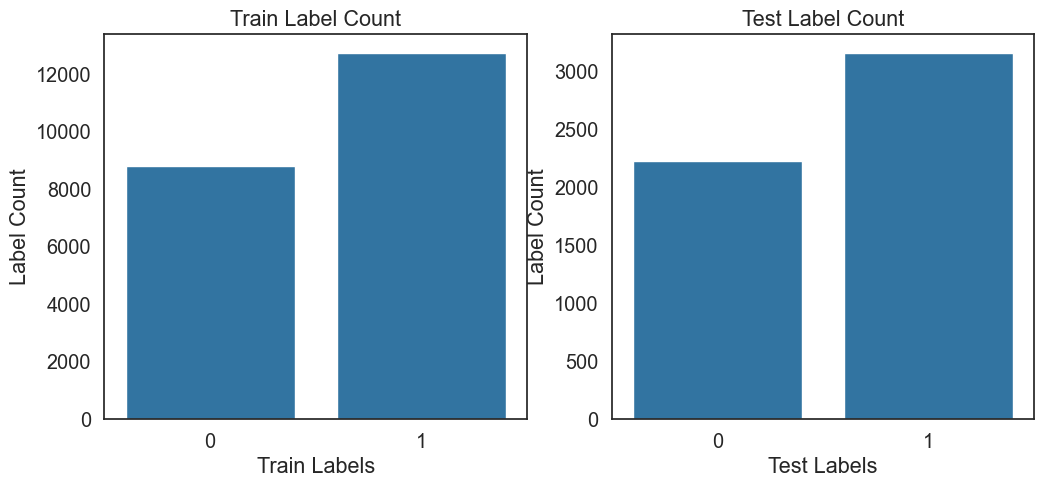

In [86]:
print(X_train.shape) #output (7666, 12222)
print(X_test.shape) #output (1917, 12222)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [88]:
counts = df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[1] / sum(counts) * 100))

label
1    15921
0    11036
Name: count, dtype: int64

Predicting only -1 = 59.06% accuracy


In [89]:
pip install imblearn

688304.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
from imblearn.over_sampling import SMOTE

Git repo para pegar visualização de dados de treino e teste: https://github.com/Aryal-Shanta/Splitting_data_in_Machine_Learning


In [91]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)


In [92]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 12758), (1, 12758)]


Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)


0.7650493807806866

In [94]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [95]:
# #Ajuste do Modelo KNN
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train_res, y_train_res)
# resultado_knn = knn.predict(X_train_res)


In [96]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

print("Precision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Precision: 79.85%
Recall: 75.40%
Accuracy: 74.41%

F1 Score: 77.56

COnfusion Matrix:
 [[1627  602]
 [ 778 2385]]


In [97]:
from sklearn.model_selection import ShuffleSplit

X = df.tweet_text
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))



Average accuracy across folds: 74.06%

Average F1 score across folds: 77.44%

Average Confusion Matrix across folds: 
 [[1591.6  614.7]
 [ 784.2 2401.5]]


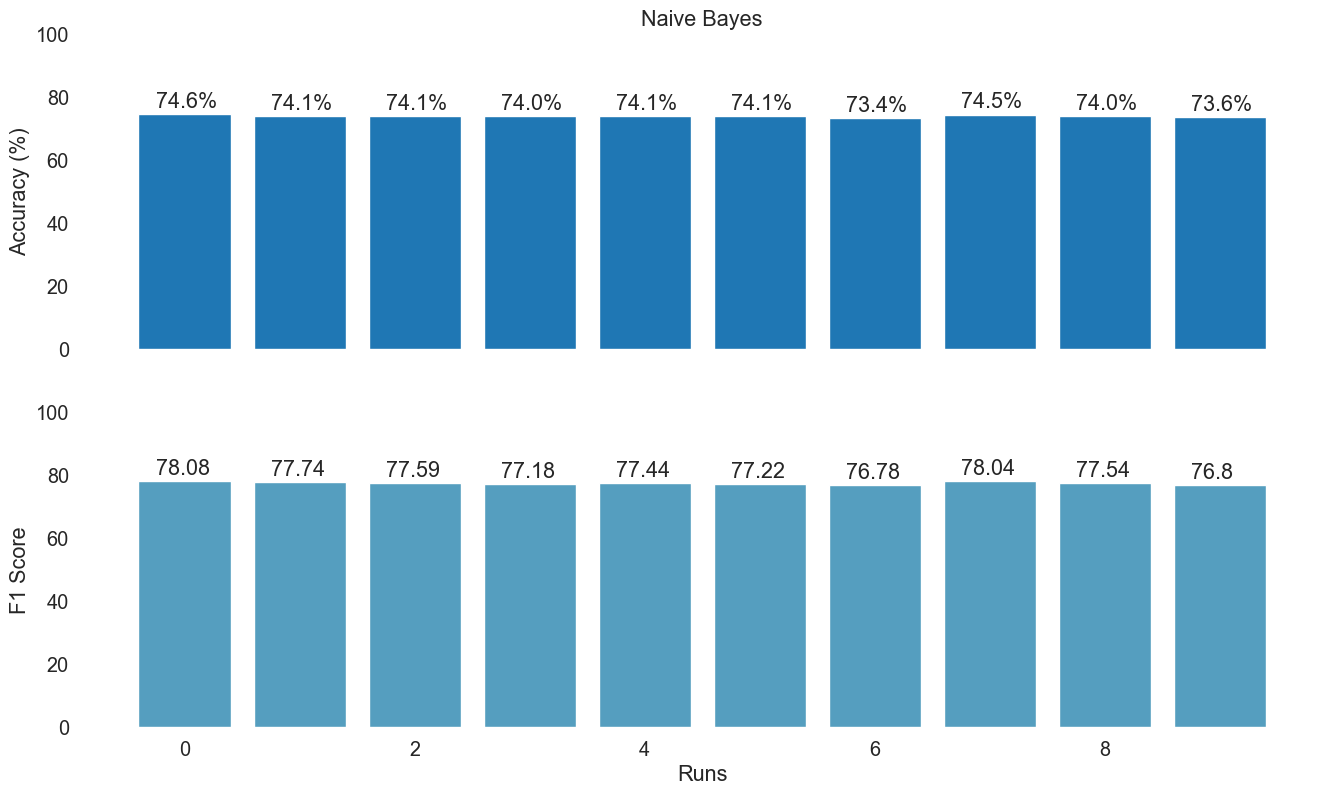

In [98]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)
plt.show()

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.tweet_text
y = df.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    RandomForestClassifier(criterion="entropy", min_samples_leaf= 1, min_samples_split= 2, n_estimators=1000),
]

sm = SMOTE()

results = {
    model.__class__.__name__: {
        'accuracy': [],
        'f1_score': [],
        'confusion_matrix': [],
        'precision': [],
        'recall': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)



        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)

In [100]:
pip install scikit-learn


690973.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    avg_precision = sum(d['precision']) / len(d['precision']) * 100
    avg_recall = sum(d['recall']) / len(d['recall']) * 100


    slashes = '-' * 3012

    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Precision: {avg_precision:.2f}%
        Avg. Recall: {avg_recall:.2f}%
        Avg. Confusion Matrix:
        \n{avg_cm}
        """

    print(s)
    


KeyError: 'precision'

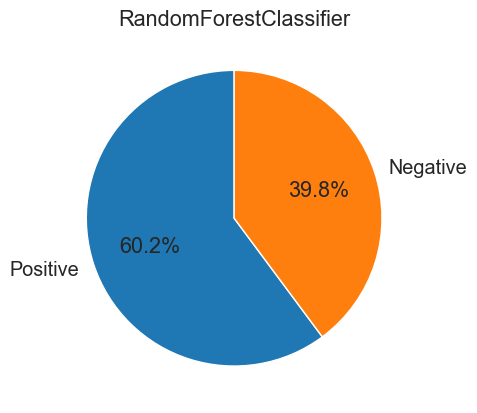

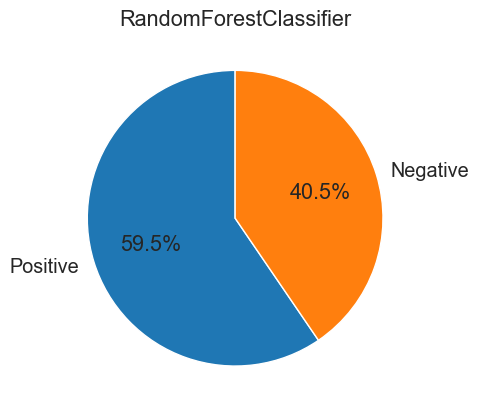

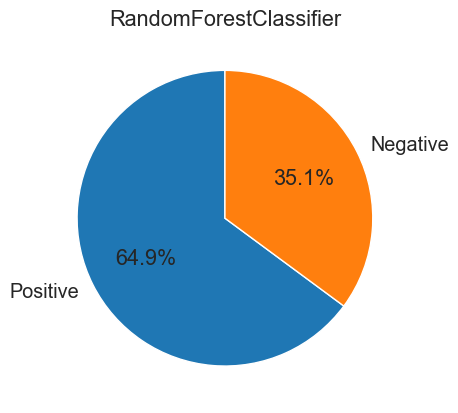

In [ ]:
import matplotlib.pyplot as plt

# Calculando as contagens de classificação positiva e negativa para cada classificador
for models, metrics in results.items():
    positive_count = 0
    negative_count = 0
    for cm in metrics['confusion_matrix']:
        positive_count += cm[1][1]  # True Positives
        negative_count += cm[0][0]  # True Negatives

    # Gerando o gráfico de pizza para o classificador atual
    fig, ax = plt.subplots()
    ax.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{model}')
    plt.show()

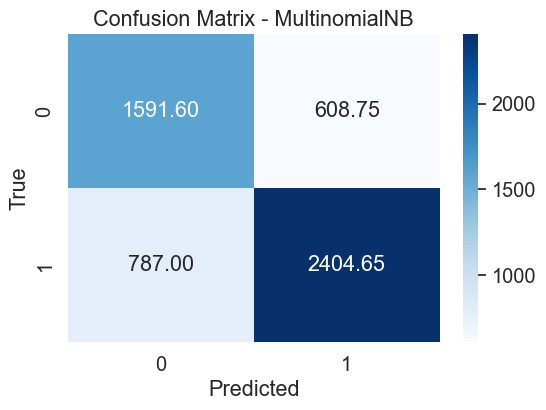

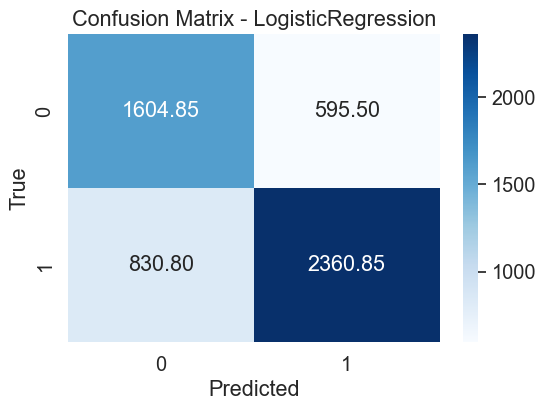

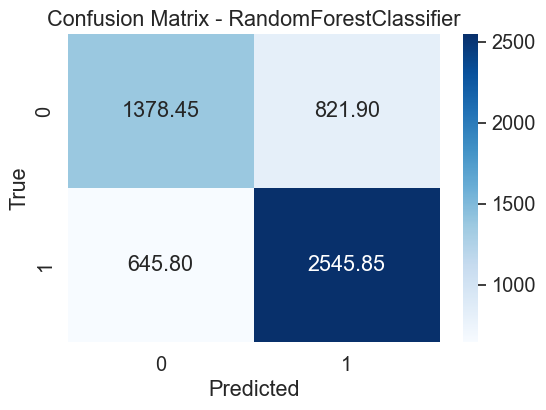

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterar sobre os resultados e plotar as matrizes de confusão
for model_name, result in results.items():
    avg_conf_matrix = sum(result['confusion_matrix']) / len(result['confusion_matrix'])
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_conf_matrix, annot=True, fmt="0.2f", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


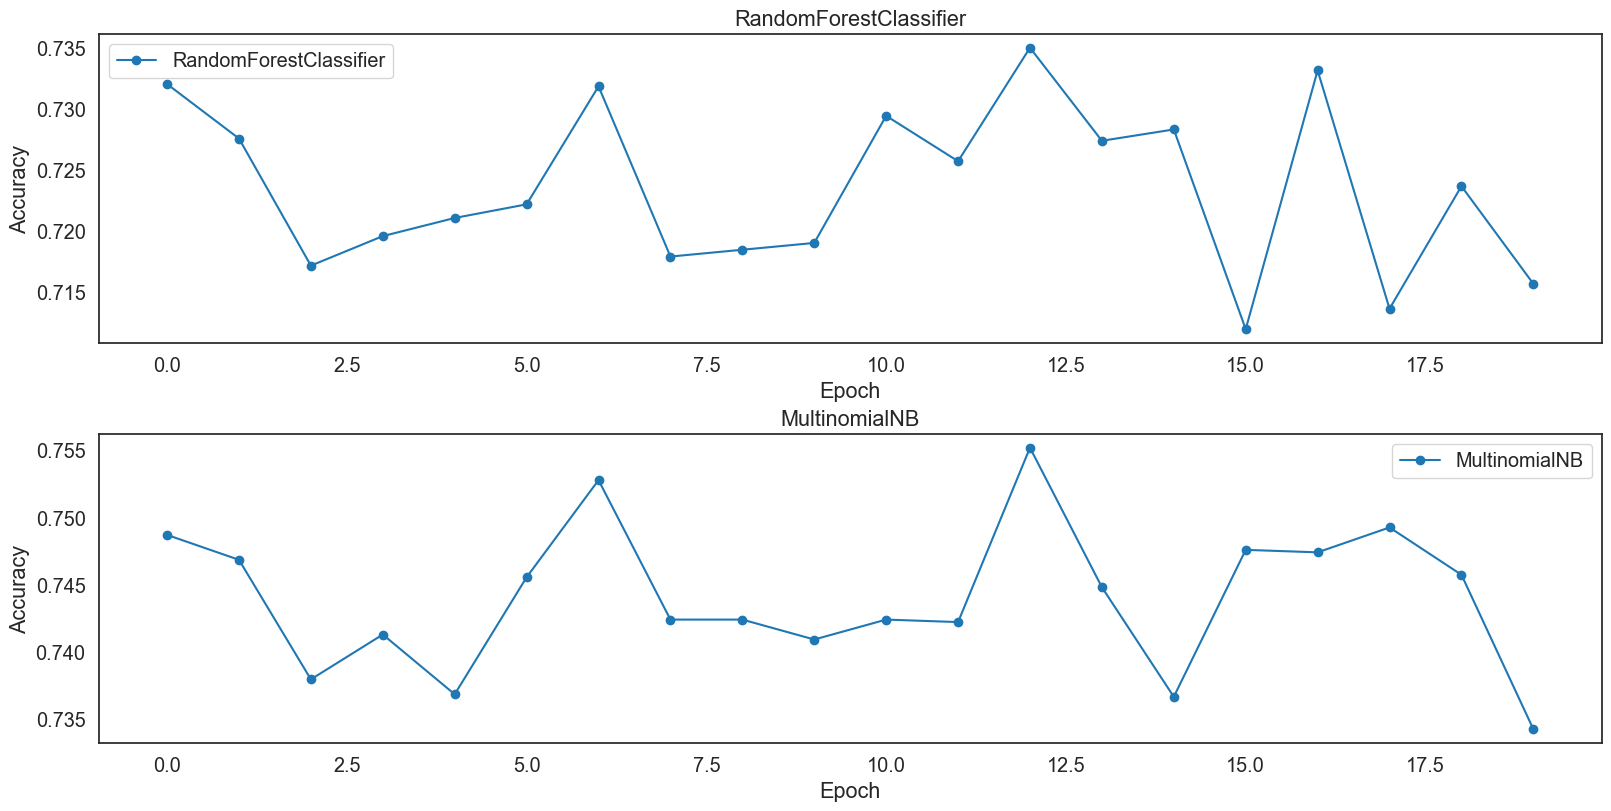

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold  # ou qualquer outro CV
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Defina modelos corretamente como instâncias
models = [RandomForestClassifier(), MultinomialNB()]
model_names = [model.__class__.__name__ for model in models]

# Crie um dicionário para armazenar os valores de acurácia
results = {model_name: {'accuracy': []} for model_name in model_names}

# Treinamento e avaliação
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)
        acc = accuracy_score(y_test, y_pred)
        results[model.__class__.__name__]['accuracy'].append(acc)

# Ajuste dinâmico do tamanho da figura
fig_height = 4 * len(models)
fig, axs = plt.subplots(len(models), 1, figsize=(16, fig_height), constrained_layout=True)

if len(models) == 1:
    axs = [axs]  # Assegure-se que axs é iterável

for i, model_name in enumerate(model_names):
    axs[i].plot(results[model_name]['accuracy'], label=model_name, marker='o')
    axs[i].set_title(model_name)
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

# Exibe os gráficos
plt.show()

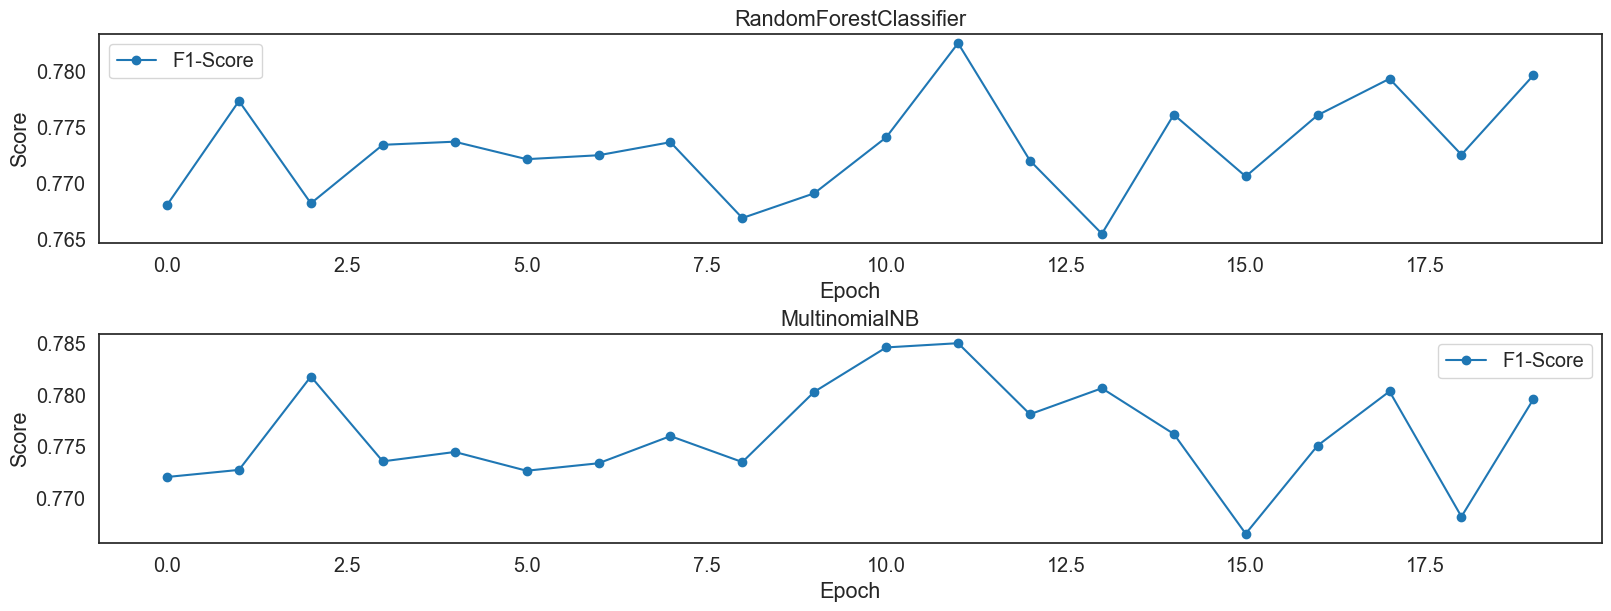

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Create a list of model names
model_names = [model.__class__.__name__ for model in models]

# Create a dictionary to store the accuracy and loss values for each model
results = {
    model.__class__.__name__: {
        'accuracy': [],
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

# Train and evaluate each model using cross-validation
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        f1score = f1_score(y_test, y_pred)

        results[model.__class__.__name__]['f1_score'].append(f1score)

# Adjust the size of the figure
fig_height = 3 * len(models)  # Adjust height based on the number of models
fig, axs = plt.subplots(len(models), 1, figsize=(16, fig_height), constrained_layout=True)

if len(models) == 1:
    axs = [axs]  # Ensure axs is iterable when there is only one subplot

for i, model_name in enumerate(model_names):
    axs[i].plot(results[model_name]['f1_score'], label='F1-Score', marker='o')
    axs[i].set_title(model_name)
    axs[i].set_ylabel('Score')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

# Display the plots
plt.show()